# 卷积神经网络


## 全连接神经网络的问题

1. 参数数量爆炸
2. 缺乏空间推理
    -  没有距离 、空间的概念。（空间关系丢失)

## CNN 简介

- cnn 可以处理多维数据
- 既不像全连接 与上一层所有元素相连，能与相邻的一些神经元相连
  - 相连的区域  被称为 神经元的感受野
- 通过只连接上一层相邻的神经元，CNN 不经可以大幅减少训练参数数量， 而且可以保存图像局部特征

# CNN 操作

加入几种层，有效的利用多维性和局部连接性


- 卷积层 Convolutional layer
- 池化层 Pooling layers
- 全连接层 Fully Connected Layer


## 卷积层 

是cnn的核心， 通过共享连接相同输出通道的所有神经元的权重和偏置，进而减少参数的个数

- 概念
  - feature map（特征图): cnn 的中间结果，N 个滤波器 N 个特征图
- 属性 
  - 超参数
    - 滤波器数量 N
    - 深度 D
    - 滤波器/内核大小 （K_h,K_w)
    - 步长 Stride
    - 填充 padding

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from skimage import io        # Package to simply read images

In [38]:
image = io.imread("./res/bird_pic_by_benjamin_planche.png")

Image shape: (680, 608)


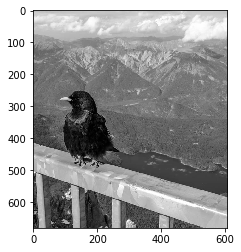

In [39]:
print("Image shape: {}".format(image.shape))
plt.imshow(image, cmap=plt.cm.gray)


In [40]:
# 将图片转换为 tensor
image_tensor = tf.convert_to_tensor(image, tf.float32, name="input_image")


In [41]:
print(image_tensor)


tf.Tensor(
[[192. 192. 192. ... 200. 200. 200.]
 [190. 190. 190. ... 200. 200. 200.]
 [189. 189. 189. ... 200. 200. 200.]
 ...
 [ 47.  43.  43. ... 184. 184. 184.]
 [ 29.  31.  53. ... 184. 184. 183.]
 [ 19.  20.  50. ... 185. 185. 184.]], shape=(680, 608), dtype=float32)


大多数Tensorflow操作都是针对成批图像的

形状为 $(B, H, W, D)$。我们将综合*扩展*我们图像的维度，将其转化为一批单一图像

In [42]:
# 扩展 tensor, 添加一个维度
image_tensors = tf.expand_dims(image_tensor, axis=0)

In [43]:
# 由于是灰度图还需要增加 一个深度
image_tensors = tf.expand_dims(image_tensors, axis=-1)
print("Tensor shape: {}".format(image_tensors.shape))


Tensor shape: (1, 680, 608, 1)


## 卷积

基本方法  **`tf.nn.conv2()`**用于 图像卷积操作。

In [44]:
# 我们创建一个 3x3 的卷积核用于高斯模糊（高斯模糊)
kernel = tf.constant([[1 / 16, 2 / 16, 1 / 16],
                      [2 / 16, 4 / 16, 2 / 16],
                      [1 / 16, 2 / 16, 1 / 16]], tf.float32, name="gaussian_kernel")

# 重塑内核，$D = 1$ and $N = 1$，保持一致


In [45]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)


In [46]:
# 调用conv2d，卷积
blurred_image = tf.nn.conv2d(image_tensors, kernel, strides=[
                             1, 1, 1, 1], padding="SAME")


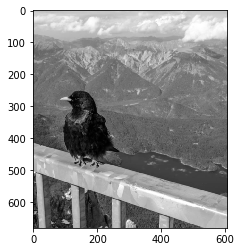

In [47]:
# 转换 为 numpy 数据
blurred_res = blurred_image.numpy()
# 获取中间2阶数据
blurred_res = blurred_res[0, ..., 0]

plt.imshow(blurred_res, cmap=plt.cm.gray)

### 特征四 边缘提取

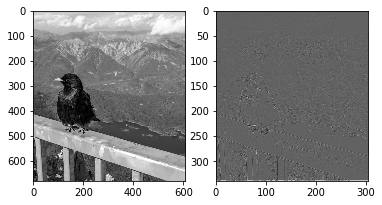

In [54]:
kernel_2 = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], tf.float32, name="edge_kernel")
kernel_2 = tf.expand_dims(tf.expand_dims(kernel_2, axis=-1), axis=-1)

edge_image = tf.nn.conv2d(image_tensors, kernel_2, strides=[
                          1, 2, 2, 1], padding="SAME")
edge_res = edge_image.numpy()[0, ..., 0]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(edge_res, cmap=plt.cm.gray)
plt.show()


## 池化层 Pooling

最大值池化和平均值池化，每个窗口中的值聚合为一个输出。分别应用最大值或平均值运算。我们再次使用低级TensorFlow API来重现本章中显示的结果

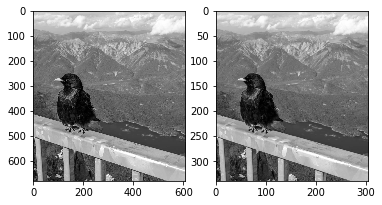

In [55]:
avg_pooled_image = tf.nn.avg_pool(image_tensors, ksize=[1, 2, 2, 1], strides=[
                                  1, 2, 2, 1], padding="SAME")
avg_res = avg_pooled_image.numpy()[0, ..., 0]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(avg_res, cmap=plt.cm.gray)
plt.show()


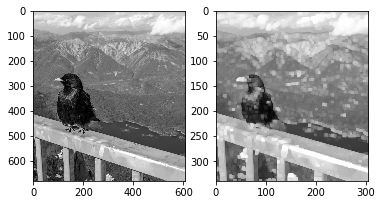

In [56]:
max_pooled_image = tf.nn.max_pool(image_tensors, ksize=[1, 10, 10, 1], strides=[
                                  1, 2, 2, 1], padding="SAME")
max_res = max_pooled_image.numpy()[0, ..., 0]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(max_res, cmap=plt.cm.gray)
plt.show()


### 有效感受野 Effective Receptive Field

感受野公式??